## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

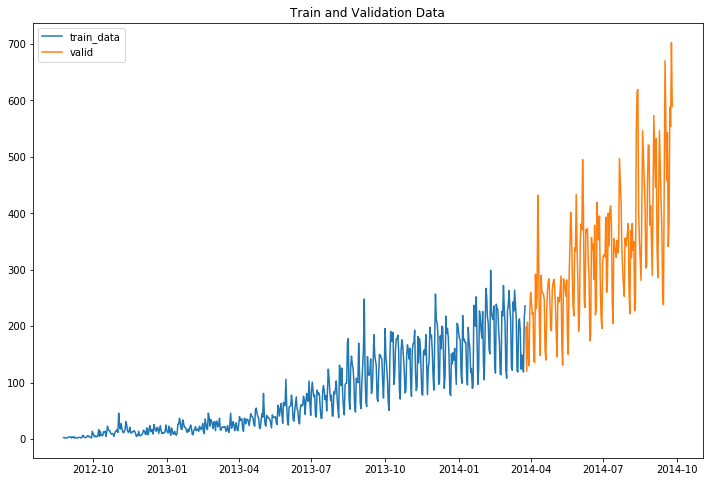

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Naive Model
Use the last (most recent) value of train as the predictions


<img src="naive formula.png" width=160 height=100 />

In [8]:
print(train_data.shape)
train_data.tail()

(578, 2)


,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [9]:
# indexing starts from 0
train_data['count'][577]

236

In [10]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][577] ## can write train.shape[0]-1

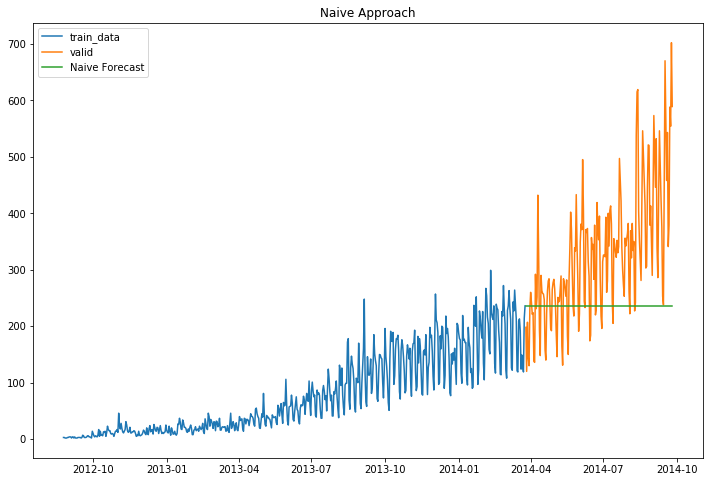

In [11]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [12]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 146.95130071764828


# Simple Average

Taking average of the complete data

In [13]:
train_data['count'].mean()

78.18166089965398

In [14]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

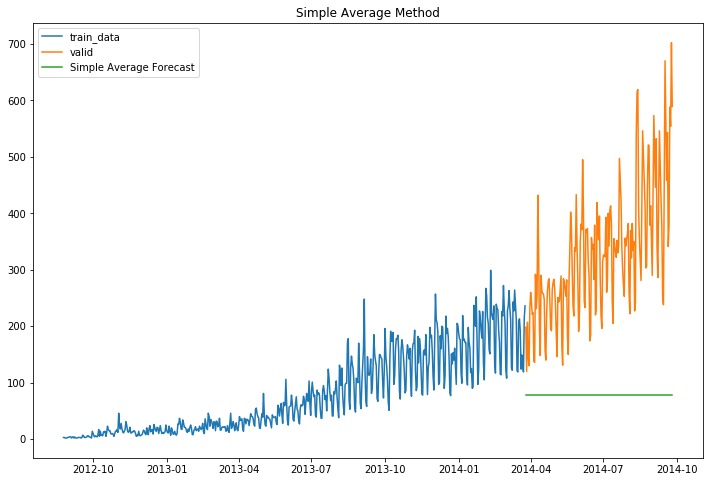

In [15]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [16]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 274.7203499275037


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [17]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [18]:
temp = (train_data['count'][571:578]).values
print('Lask week values are:', temp)
print('Average for last week is', temp.mean())

Lask week values are: [192 124 149 129 119 214 236]
Average for last week is 166.14285714285714


In [19]:
# Defining predictions for validation
valid_data['average_lastweek'] = temp.mean()

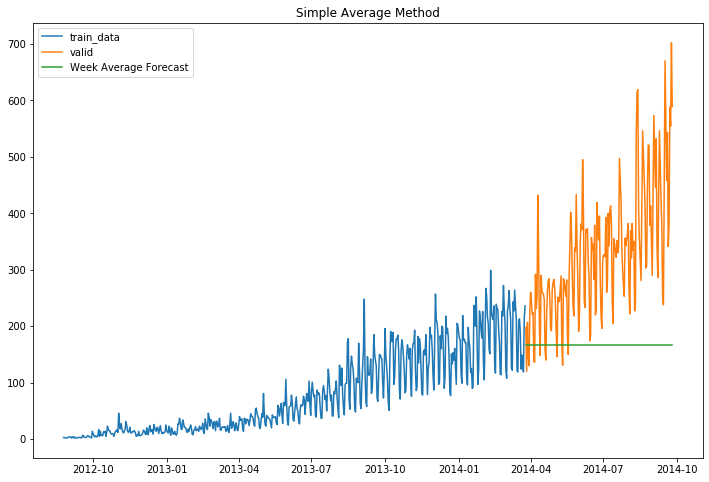

In [20]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastweek'], label='Week Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [21]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_lastweek']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 198.23734967376558


This is better than the last method. Here, instead of 7 days, you can take last 14 days, or 20 days and see which gives you more accurate results. Try it out at your end.

# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 7 days' value for each data point.

<img src = '3hotmk.webp'>

In [22]:
# list holding last seven values

valid_data['moving_average'] = 0
week_values = [192, 124, 149, 129, 119, 214, 236]

In [23]:
for i in range(0,len(valid_data)):
    end = len(week_values)
    start = len(week_values)-7
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

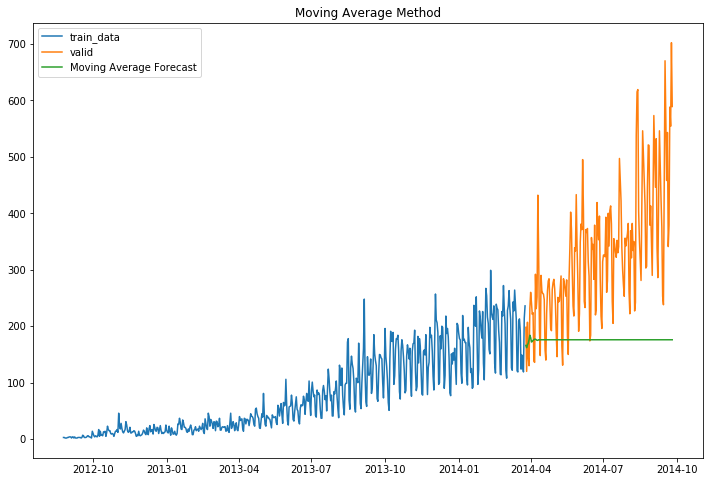

In [69]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [32]:
valid_data['moving_average'].head(25)

Date
2014-03-26    166
2014-03-27    162
2014-03-28    167
2014-03-29    170
2014-03-30    176
2014-03-31    184
2014-04-01    180
2014-04-02    172
2014-04-03    173
2014-04-04    175
2014-04-05    176
2014-04-06    177
2014-04-07    177
2014-04-08    176
2014-04-09    175
2014-04-10    175
2014-04-11    176
2014-04-12    176
2014-04-13    176
2014-04-14    176
2014-04-15    176
2014-04-16    176
2014-04-17    176
2014-04-18    176
2014-04-19    176
Name: moving_average, dtype: int64

In [25]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 190.2772719412156


# Weighted Moving Average
Move the window and assign weights to the values in this window. I am taking higher weights to recent observations. Weights can be assigned manually or using a function.

In [61]:
# list holding last seven values and weights

week_values = train_data['count'][571:578].values
week_values = week_values.tolist()

weights = []
for i in range(1,8):
    W = i/13
    weights.append(W)

In [62]:
len(week_values), len(weights)

(7, 7)

In [63]:
valid_data['weighted_moving_average'] = 0

In [64]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-7
    
    final_values = week_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

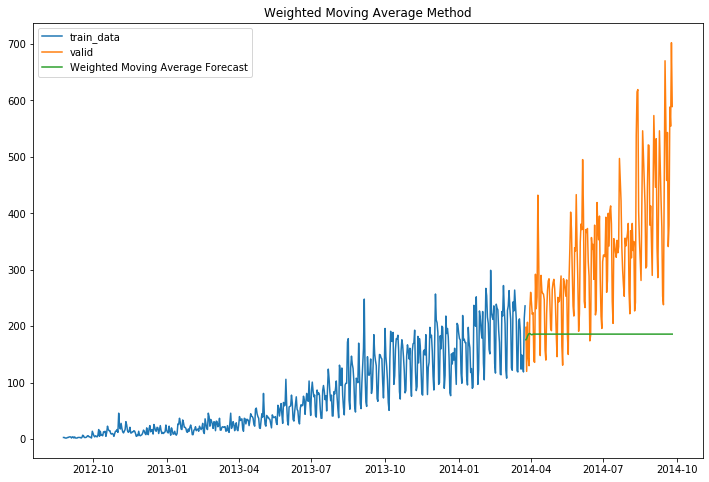

In [65]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [66]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 182.40362255651374


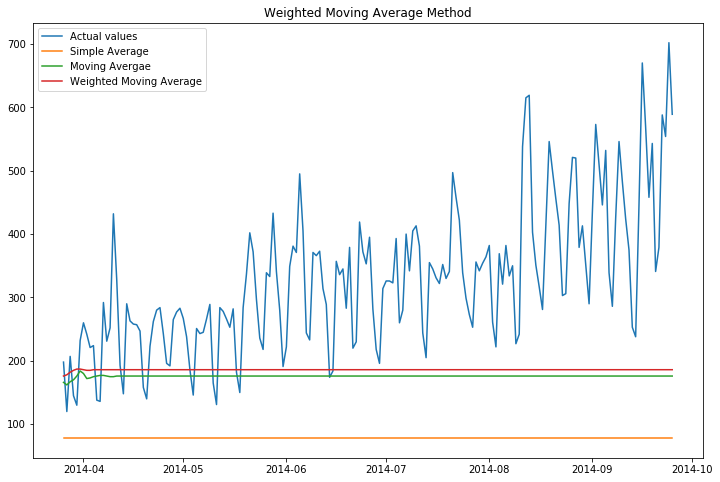

In [70]:
plt.figure(figsize=(12,8))

plt.plot(valid_data.index,valid_data['count'], label='Actual values')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Avergae')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()